<a href="https://colab.research.google.com/github/LikeMattorSomething/FutureTalentsProjects/blob/main/GraceDataMLTests_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data PreProcessing

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



GraceData = pd.read_csv("/content/drive/MyDrive/Future Talents Data/Grace_All years combined 08-07-2025.csv")

GraceData.info

GraceData = GraceData[GraceData['Diabetes'] != '#NULL!'] # Removed bad data with no diabetes
GraceData = GraceData[GraceData['Diabetes'] != '-1']

GraceData['Country'] = pd.factorize(GraceData['Country'])[0] + 1 # Convert 'Country' column to numerical



X = GraceData.drop(columns=["Diabetes","seriali"])
y = GraceData["Diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Models

In [16]:
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ModelSelection = int(input("1 nearest neighbour, 2 decision tree, 3 random forest"))

if ModelSelection == 1:
  parameters = {"n_neighbors":range(1,50)}
  modelType = KNeighborsClassifier()
elif ModelSelection == 2:
  parameters = {"max_depth":range(1,30),'max_features': range(1,5)} # Parameters for decision tree
  modelType = DecisionTreeClassifier()
elif ModelSelection == 3:
  parameters = {"n_estimators": (19,20),"max_depth": (71,70)} # Parameters for random forest (estimators 181)
  modelType = RandomForestClassifier()
else:
  print("Invalid input")



GSD = GridSearchCV(modelType,parameters)

GSD.fit(X_train_scaled,y_train) # Fit on scaled data

print(GSD.best_estimator_.score(X_test_scaled,y_test)) # Score on scaled data
print(GSD.best_params_)


1 nearest neighbour, 2 decision tree, 3 random forest3
0.9551569506726457
{'max_depth': 71, 'n_estimators': 19}


# Confusion Matrix

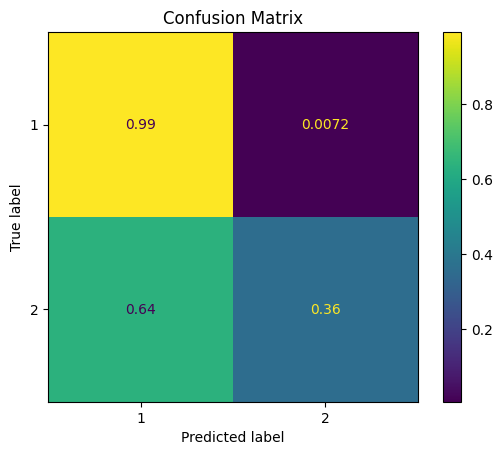

FreeSugarsg                   0.032536
FreeSugarspcfoodE             0.023248
FreeSugarspctotE              0.021911
WHITEBREAD                    0.020287
totalfruit                    0.019866
TotalsugarspctotE             0.018574
TotalsugarspcfoodE            0.017759
CHOpctotE                     0.016594
Totalsugarsg                  0.015633
Proteing                      0.015133
FoodEkcal                     0.015016
Energykcal                    0.014901
Saturatedfattyacidsg          0.014840
Fruitvegportions              0.014733
SFApcfoodE                    0.014579
FatpctotE                     0.014208
Fatg                          0.014161
Totfruitvegportions           0.013839
FatpcfoodE                    0.013358
AOACFibreg                    0.013356
totalmeat                     0.013204
CHOpcfoodE                    0.012811
totalveg                      0.012711
totalredmeat                  0.012326
Starchg                       0.012161
PASTARICEANDOTHERCEREALS 

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

PredictedResults = GSD.predict(X_test_scaled) # Predict on scaled data
ActualResults = y_test

cm = confusion_matrix(ActualResults, PredictedResults)
disp = ConfusionMatrixDisplay.from_estimator(GSD, X_test_scaled, y_test, normalize="true") # Display using scaled data

plt.title("Confusion Matrix")
plt.show()

myClassifiers = pd.Series(GSD.best_estimator_.feature_importances_, index=X_train.columns)

DietImportance = myClassifiers[["Energykcal", "FoodEkcal", "Proteing", "Fatg", "Saturatedfattyacidsg", "Carbohydrateg", "Totalsugarsg", "Starchg", "FreeSugarsg", "AOACFibreg", "FatpctotE", "FatpcfoodE", "CHOpcfoodE", "CHOpctotE", "SFApcfoodE", "SFApctotE", "TotalsugarspcfoodE", "TotalsugarspctotE", "FreeSugarspcfoodE", "FreeSugarspctotE", "WHOLEMEALBREAD", "SOFTDRINKSLOWCALORIE", "SOFTDRINKSNOTLOWCALORIE", "SUGARCONFECTIONERY", "FRUIT", "NUTSANDSEEDS", "PASTARICEANDOTHERCEREALS", "SALADANDOTHERRAWVEGETABLES", "WHITEBREAD", "Beansg", "totalfruit", "totalveg", "totalfruitandveg", "Fruitvegportions", "Totfruitvegportions", "Achieve5", "ProcessedRedMeatg", "totalredmeat", "totalmeat"]]
DietImportance = DietImportance.sort_values(ascending=False)
print(DietImportance)

# myClassifiers = myClassifiers.sort_values(ascending=False)
# print(myClassifiers.head(15))